<a href="https://colab.research.google.com/github/AlirezPa/MLZNU03/blob/main/ML_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ترسیم و برش های مقطعی
برای SSE


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [6]:
df = pd.read_csv('/content/Summary of Weather.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

<ipython-input-6-6e766fd25802>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Summary of Weather.csv')


In [7]:
df = df[['MinTemp','MaxTemp']]
df.head(10)

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667
5,21.666667,26.666667
6,22.777778,28.333333
7,22.222222,26.666667
8,22.777778,27.222222
9,21.666667,25.555556


<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

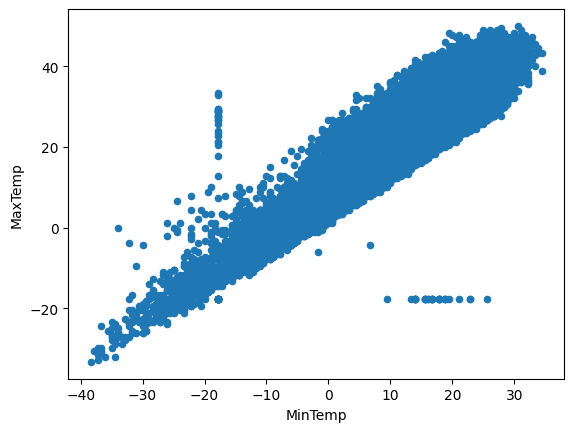

In [8]:
df.plot.scatter('MinTemp','MaxTemp')

In [10]:
# define the MSE
def mse_cost(predict , target):
  N = predict.shape[0]
  diff = predict.ravel() - target.ravel()
  cost = np.dot(diff,diff.T)/(2*N)
  return cost


In [12]:
#define the predict for simple linear model
def LinearModel(thetas , X):
  # normalize add biass term
  X = (X-X.mean())/X.std()
  X = np.hstack((X,np.ones((X.shape[0],1),dtype=X.dtype)))
  return np.dot(X,thetas)

In [13]:
# init data structures
vis_df = df.sample(frac=0.1)
y= vis_df.iloc[:,1].to_numpy().reshape(-1,1)
X= vis_df.iloc[:,0].to_numpy().reshape(-1,1)


In [16]:
# grid search over "all" possible theta values and compute cost
start, end, step = -200, 200, 5
thetas_0, thetas_1 = np.arange(start, end, step), np.arange(start, end, step)

# loop over the all the parameter pairs and create a list of all possible pairs
thetas_lst = []
for theta_0 in thetas_0:
    for theta_1 in thetas_1:
        thetas_lst.append(np.array([theta_0, theta_1]).reshape(-1, 1))

linear_cost_lst = []
for thetas in thetas_lst:
    # get prediction from our model
    pred_linear = LinearModel(thetas, X)
    # keep track of the cast per parameter pairs
    linear_cost_lst.append(mse_cost(pred_linear, y))

In [17]:
# arrange the costs back to a square matrix grid
axis_length = len(np.arange(start, end, step))
linear_cost_matrix = np.array(linear_cost_lst).reshape(axis_length, axis_length)

In [18]:
import plotly.graph_objects as go

# plot the surface plot with plotly's Surface
fig = go.Figure(data=go.Surface(z=linear_cost_matrix,
                                x=thetas_0,
                                y=thetas_1))

# add a countour plot
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# annotate the plot
fig.update_layout(title='Linear Model MSE Cost Surface',
                  scene=dict(
                    xaxis_title='theta_0 (intercept)',
                    yaxis_title='theta_1 (slope)',
                    zaxis_title='MSE Cost'),
                  width=700, height=700)

fig.show()